In [423]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [416]:
'''
EMAIL SPAM DETECTION
'''
metric_data=[] 
# ths lost will contain the acuuracy, precision, recall, f1 score of each of the classifier algorithms after best optimizatoion

In [194]:
# loading the dataset and storing it in dataframe
data=pd.read_csv(r'Desktop/spam.csv',encoding='latin-1')

In [195]:
print(data.head())
print(data.info())
print(data.describe())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [196]:
# listing all the columns
list1=data.columns[:]
list1

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [197]:
# chaecking for null values
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [198]:
# removing unwanted columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [199]:
#renaming column names
data.rename(columns={'v1':'Category','v2':'Email'},inplace=True)

In [200]:
# removing duplicate rows
print(data.describe())
data=data.drop_duplicates()
print(data.describe())

       Category                   Email
count      5572                    5572
unique        2                    5169
top         ham  Sorry, I'll call later
freq       4825                      30
       Category                                              Email
count      5169                                               5169
unique        2                                               5169
top         ham  Go until jurong point, crazy.. Available only ...
freq       4516                                                  1


/var/folders/sr/xggt0wqj371cks38jp61y2100000gn/T/ipykernel_97829/2217951315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Category",data=data,palette=colors)


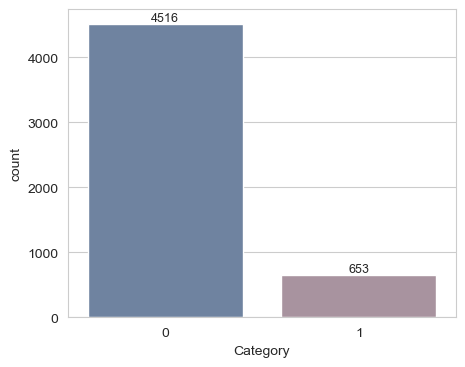

In [413]:
# checking how many spam and non spam mails are there
colors =["#6782a8", "#ab90a0" ]
plt.figure(figsize=(5,4))
ax=sns.countplot(x="Category",data=data,palette=colors)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 0.1, 
            '{:.0f}'.format(p.get_height()), 
            ha='center', va='bottom', fontsize=9)
sns.set_style('whitegrid')
plt.show()

In [202]:
# enclabel_encoderoding categorical data -> Category
label_encoder=LabelEncoder() # label_encoder is an object of class LabelEncoder
data['Category']=label_encoder.fit_transform(data['Category'])

In [203]:
data.head() # 0 for not spam and 1 for spam

,Category,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [204]:
'''
Text Data Preprocessing: tokenisation,lowercasing,removing special characters, removing stopwords, removing punctuations,removing numbers,
lemmatization
'''
#importing required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re # a module used for data preprocessing

nltk.download('stopwords')  # dowloads the stopwords eg. the ,a, an ,is
nltk.download('punkt')  # for tokenization
nltk.download('wordnet') # Downloading WordNet is necessary for using NLTK's lemmatization tools, 
#which rely on the database to transform words into their base or root forms. Lemmatization uses WordNet 
#to ensure that the resulting base form is a valid word in the language.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/utkarsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/utkarsh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [205]:
data.head()

,Category,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [206]:
# preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ''

    #lowercasing the text
    text=text.lower()

    #removing punctuations and special characters from the text also numbers
    text=re.sub(r"[^a-zA-Z\s]","",text)# syntax-> re.sub(pattern to be replaced,replacement, string on which it is applied)
    # ^ denotes not / false ... ^a-zA-Z\s denotes replace a character which is not a-z A-Z or space

    #tokenization into words
    text=word_tokenize(text)

    #removing stopwords
    stop_words=set(stopwords.words('English')) # set of all stopwords
    text=[word for word in text if word not in stop_words]
    '''
    or
    for word in stop_words:
        if word in stop_words:
            text.remove(word) 
    '''

    # lemmatization
    lemmatizer=WordNetLemmatizer() # creating object
    text=[lemmatizer.lemmatize(word) for word in text]

    #for vectorization in further steps we need to convert the list of words back into string
    text=' '.join(text)
    return text

data['Email']=data['Email'].apply(preprocess_text)


In [207]:
# stop_words=set(stopwords.words('english'))
# print(type(stop_words)) => <class 'set'>

In [208]:
# checking whether data has been processed or not
data.head(100)

,Category,Email
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though
...,...,...
95,1,free ringtone waiting collected simply text pa...
96,0,watching telugu moviewat abt u
97,0,see finish load loan pay
98,0,hi wk ok hols yes bit run forgot hairdresser a...


In [382]:
'''
Text Vectorization
'''
from sklearn.feature_extraction.text import CountVectorizer
#creating object
vectorizer=CountVectorizer()

#separting into x and y
x=vectorizer.fit_transform(data['Email'])
y=data['Category']


<class 'pandas.core.series.Series'>


In [216]:
# splitting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [420]:
# classification algorithms
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest':RandomForestClassifier(class_weight='balanced'),
    'Support Vector Machine':SVC(class_weight='balanced'),
    'K-Nearest Neigbors':KNeighborsClassifier(),
    'Naive Bayes':MultinomialNB()
}

LOGISTIC REGRESSION



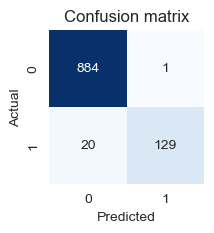

Logistic Regression accuracy: 97.96905222437138
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

--------------------------------------------------------------------------------------------------
DECISION TREE



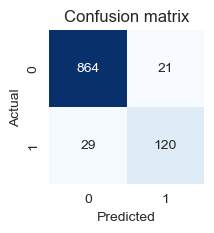

Decision Tree accuracy: 95.16441005802709
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       885
           1       0.85      0.81      0.83       149

    accuracy                           0.95      1034
   macro avg       0.91      0.89      0.90      1034
weighted avg       0.95      0.95      0.95      1034

--------------------------------------------------------------------------------------------------
RANDOM FOREST



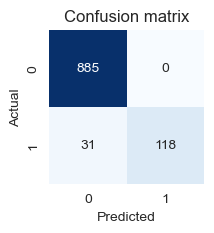

Random Forest accuracy: 97.00193423597679
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

--------------------------------------------------------------------------------------------------
SUPPORT VECTOR MACHINE



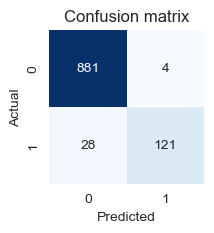

Support Vector Machine accuracy: 96.90522243713733
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       0.97      0.81      0.88       149

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

--------------------------------------------------------------------------------------------------
K-NEAREST NEIGBORS



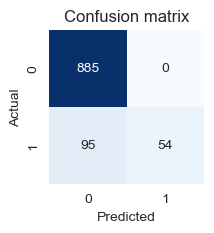

K-Nearest Neigbors accuracy: 90.81237911025146
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       885
           1       1.00      0.36      0.53       149

    accuracy                           0.91      1034
   macro avg       0.95      0.68      0.74      1034
weighted avg       0.92      0.91      0.89      1034

--------------------------------------------------------------------------------------------------
NAIVE BAYES



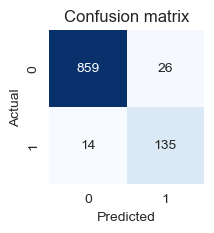

Naive Bayes accuracy: 96.13152804642166
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       885
           1       0.84      0.91      0.87       149

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034

--------------------------------------------------------------------------------------------------


In [424]:
# training and evaluating classifiers
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
results={}

for name,clf in classifiers.items():
    print(f"{name.upper()}\n")
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test) # predicting values for x_test
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name} accuracy: {accuracy*100}")
    print(classification_report(y_test,y_pred))
    if name=='Logistic Regression':
        metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])
    print("--------------------------------------------------------------------------------------------------")
    

In [261]:
'''
Over-Sampling and Under-Sampling not enhancing the accuracy
'''

'\nOver-Sampling and Under-Sampling not enhancing the accuracy\n'

In [426]:
'''THROUGH BAGGING  DECISION TREE ACCURACY GOT IMPROVED =>  original accuracy=95.164 to 97.098''' 
from sklearn.ensemble import BaggingClassifier

# Initialize base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=52)

# Initialize Bagging Classifier with base model
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=52)

# Train the Bagging Classifier
bagging_model.fit(x_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])

Accuracy: 97.09864603481626


In [309]:
'''
applying ADABOOST on DECISION TREE with Grid Search =>  original accuracy=95.164 to 96.71
'''
from sklearn.ensemble import AdaBoostClassifier
param_grid={
    # 'max_depth':[None,3,4,5,6,7],
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[40,50,555,60,70]
}

base_model = DecisionTreeClassifier(random_state=42)
adaboost_clf=AdaBoostClassifier(estimator=base_model, random_state=42)

grid_search=GridSearchCV(adaboost_clf,param_grid,cv=5,scoring='accuracy',verbose=1)

In [314]:
#applying grid search
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                           random_state=42),
                                          random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [40, 50, 555, 60, 70]},
             scoring='accuracy', verbose=1)

In [317]:
best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(best_estimator)

Best Parameters: {'learning_rate': 1, 'n_estimators': 555}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=42),
                   learning_rate=1, n_estimators=555, random_state=42)


In [321]:
# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))

Confusion matrix: 
[[871  14]
 [ 20 129]]
accuracy: 96.71179883945842
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       885
           1       0.90      0.87      0.88       149

    accuracy                           0.97      1034
   macro avg       0.94      0.92      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [339]:
'''
GRID SEARCH + ADABOOSTING ON LOGISTIC REGRESSION : original (simple): 97.969 to 97.77
decreased accuracy
'''
from sklearn.ensemble import AdaBoostClassifier
param_grid={
    # 'max_depth':[None,3,4,5,6,7],
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[40,50,55,60,70],
    'algorithm': ['SAMME', 'SAMME.R']
}

base_model =LogisticRegression(random_state=42)
adaboost_clf=AdaBoostClassifier(estimator=base_model, random_state=42)

grid_search=GridSearchCV(adaboost_clf,param_grid,cv=5,scoring='accuracy',verbose=1)

#applying grid search
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(best_estimator)
print('\n')

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 70}
AdaBoostClassifier(algorithm='SAMME',
                   estimator=LogisticRegression(random_state=42),
                   learning_rate=0.1, n_estimators=70, random_state=42)


Confusion matrix: 
[[881   4]
 [ 19 130]]
accuracy: 97.77562862669245
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.87      0.92       149

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [427]:
'''
GRID SEARCH + ADABOOSTING ON RANDOM FOREST : original (simple): 96.615 to 97.29
decreased accuracy
'''
from sklearn.ensemble import AdaBoostClassifier
param_grid={
    # 'max_depth':[None,3,4,5,6,7],
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[40,50,55,60,70],
    'algorithm': ['SAMME', 'SAMME.R']
}

base_model = RandomForestClassifier(random_state=42)
adaboost_clf=AdaBoostClassifier(estimator=base_model, random_state=42)

grid_search=GridSearchCV(adaboost_clf,param_grid,cv=5,scoring='accuracy',verbose=1)

#applying grid search
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(best_estimator)
print('\n')

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))

metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 40}
AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(random_state=42),
                   learning_rate=0.001, n_estimators=40, random_state=42)


Confusion matrix: 
[[885   0]
 [ 28 121]]
accuracy: 97.29206963249516
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [428]:
'''
GRID SEARCH ON SVC : original accuracy=96.9 to 97.871
decreased accuracy
'''


base_model=SVC(random_state=42)
   
param_grid = {
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],        # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly'],   # Specifies the kernel type to be used in the algorithm
    'degree': [2, 3, 4, 5]                 # Degree of the polynomial kernel function (only relevant for 'poly')
}

grid_search=GridSearchCV(base_model,param_grid,cv=5,scoring='accuracy',verbose=1)
    
#applying grid search
grid_search.fit(x_train,y_train)
    
best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"{name} accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))


metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])



Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Confusion matrix: 
[[881   4]
 [ 18 131]]
Naive Bayes accuracy: 97.87234042553192
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.88      0.92       149

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [429]:
'''
GRID SEARCH ON NAIVE BAYES : original accuracy= 96.13 to 96.518

'''


base_model=MultinomialNB()
   
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Additive smoothing parameter
    'fit_prior': [True, False]            # Whether to learn class prior probabilities or not
}

grid_search=GridSearchCV(base_model,param_grid,cv=5,scoring='accuracy',verbose=1)
    
#applying grid search
grid_search.fit(x_train,y_train)
    
best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"{name} accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))


print(type(classification_report(y_test,y_pred)))

metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 5.0, 'fit_prior': True}
Confusion matrix: 
[[879   6]
 [ 30 119]]
Naive Bayes accuracy: 96.5183752417795
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       885
           1       0.95      0.80      0.87       149

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.92      1034
weighted avg       0.96      0.97      0.96      1034

<class 'str'>


In [430]:
'''
GRID SEARCH ON KNN : original accuracy= 90.81 to 93.133

'''


base_model=KNeighborsClassifier()
   
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],    # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric to use
}

grid_search=GridSearchCV(base_model,param_grid,cv=5,scoring='accuracy',verbose=1)
    
#applying grid search
grid_search.fit(x_train,y_train)
    
best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"{name} accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))


metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Confusion matrix: 
[[885   0]
 [ 71  78]]
Naive Bayes accuracy: 93.13346228239845
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       885
           1       1.00      0.52      0.69       149

    accuracy                           0.93      1034
   macro avg       0.96      0.76      0.82      1034
weighted avg       0.94      0.93      0.92      1034



In [ ]:
'''
Logistic Regression accuracy=97.969
Decision Tree maximum accuracy achieved after bagging=97.098
Random Forest maximum accuracy achieved after grid search + adaboosting= 97.29
SVC maximum accuracy achieved after grid search=97.871
Naive Bayes maximum accuracy achieved after grid search=96.518
KNN maximum accuracy achieved after Grid Search =93.133
'''

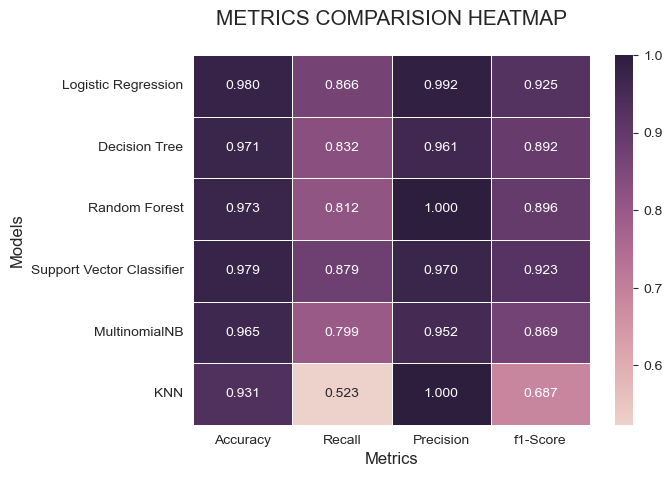

In [444]:
'''
METRICS COMPARISION HEATMAP
'''
xticklabels=['Accuracy','Recall','Precision','f1-Score']
yticklabels=['Logistic Regression','Decision Tree','Random Forest','Support Vector Classifier','MultinomialNB','KNN']
sns.heatmap(metric_data,annot=True,fmt='.3f',xticklabels=xticklabels,yticklabels=yticklabels,cmap=sns.cubehelix_palette(as_cmap=True),linewidths=0.5, linecolor='white')
plt.xlabel("Metrics",fontsize=12)
plt.ylabel("Models",fontsize=12)
plt.title('METRICS COMPARISION HEATMAP\n',fontsize=15)
plt.show()

In [452]:
best_estmator=LogisticRegression()
spam=input("Enter the message or Email: \n")
spam=vectorizer.transform([spam])
prediction=best_estimator.predict(spam)
if prediction[0]==1:
    print("\nSPAM MESSAGE")
else:
    print("\nNON SPAM MESSAGE")

Enter the message or Email: 
 Congratulations! You have been selected as the grand prize winner of our $1,000,000 lottery! This is a once-in-a-lifetime opportunity to change your life forever.   To claim your prize, please follow the steps below: 1. Click on the link below to verify your identity: [Verify Now](http://example.com/verify) 2. Complete the verification form with your personal details. 3. Wait for our confirmation email with further instructions.  Please note that this is a limited-time offer, and you must complete the verification process within 24 hours to claim your prize. If you do not respond within this timeframe, we will have to select another winner.  Do not miss out on this incredible opportunity! Click the link now and secure your $1,000,000 prize.



SPAM MESSAGE
